In [443]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation, PillowWriter

In [444]:
#Importing and Fixing Data: 

In [445]:
#Importing sixty degrees latitude 
s = pd.read_csv('Sixty_Degrees_Latitude.csv')

In [446]:
s.head()

,Date,Solar Zenith Angle (deg),Solar Elevation corrected for atm refraction (deg),Solar Azimuth Angle (deg cw from N)
0,1/1/10,82.989451,7.132184,179.177033
1,1/8/10,82.226792,7.884296,178.438920
2,1/15/10,81.111999,8.986375,177.780256
3,1/22/10,79.668832,10.416609,177.228195
4,1/29/10,77.927025,12.146496,176.804258


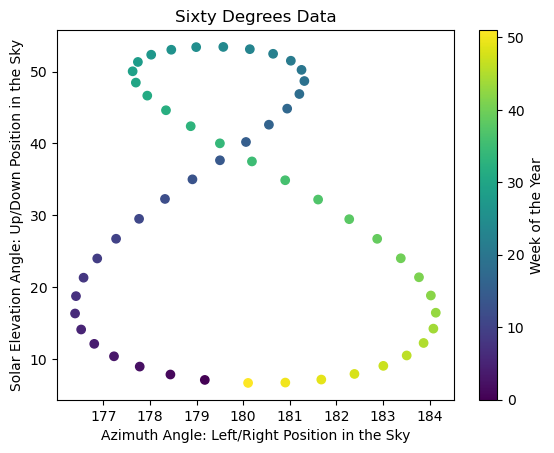

In [447]:
#Plotting a static graph of the analemma for 60 deg

x_s = s['Solar Azimuth Angle (deg cw from N)'] #x-axis: azimuth angle 
y_s = s['Solar Elevation corrected for atm refraction (deg)'] #y-axis: elevation angle

plt.scatter(x_s, y_s, c = s.index)
plt.title('Sixty Degrees Data')
plt.xlabel('Azimuth Angle: Left/Right Position in the Sky')
plt.ylabel('Solar Elevation Angle: Up/Down Position in the Sky')
plt.colorbar(label = 'Week of the Year')
plt.show()

In [448]:
#Importing negative 60 degrees latitude 
ns = pd.read_csv('Negative_Sixty_Degrees_Latitude.csv')

In [449]:
ns.head()

,Date,Solar Zenith Angle (deg),Solar Elevation corrected for atm refraction (deg),Solar Azimuth Angle (deg cw from N)
0,1/1/10,37.018988,52.993174,1.356734
1,1/8/10,37.802988,52.209523,2.523939
2,1/15/10,38.946559,51.066474,3.490160
3,1/22/10,40.419331,49.594402,4.207824
4,1/29/10,42.185462,47.829150,4.656333


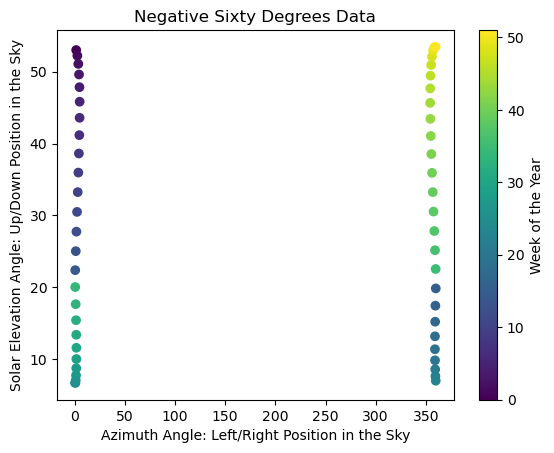

In [450]:
#Plotting an initial static graph for negative 60 deg

x_ns = ns['Solar Azimuth Angle (deg cw from N)'] #x-axis: azimuth angle 
y_ns = ns['Solar Elevation corrected for atm refraction (deg)'] #y-axis: elevation angle

scatter = plt.scatter(x_ns, y_ns, c = ns.index)
plt.title('Negative Sixty Degrees Data')
plt.xlabel('Azimuth Angle: Left/Right Position in the Sky')
plt.ylabel('Solar Elevation Angle: Up/Down Position in the Sky')
plt.colorbar(label = 'Week of the Year')
plt.show()

In [451]:
#Data looks wrong! Need to fix the origin of the azimuth angle data

#Fixing ns['Solar Azimuth Angle (deg cw from N)'] to be centered around 180 - matching the sixty deg data
az_angle = ns['Solar Azimuth Angle (deg cw from N)']
for i in range(len(az_angle)):
    if ns.iloc[i, 3] < 180:
        ns.iloc[i, 3] += 180
    else: 
        ns.iloc[i, 3] -= 180

print(ns['Solar Azimuth Angle (deg cw from N)'])

0     181.356734
1     182.523939
2     183.490160
3     184.207824
4     184.656333
5     184.839437
6     184.779967
7     184.513691
8     184.083530
9     183.534821
10    182.911841
11    182.255564
12    181.602435
13    180.983872
14    180.426187
15    179.950644
16    179.573471
17    179.305721
18    179.153026
19    179.115324
20    179.186709
21    179.355538
22    179.604859
23    179.913208
24    180.255703
25    180.605384
26    180.934686
27    181.216963
28    181.427956
29    181.547108
30    181.558609
31    181.452098
32    181.222975
33    180.872364
34    180.406827
35    179.837996
36    179.182269
37    178.460708
38    177.699133
39    176.928350
40    176.184281
41    175.507703
42    174.943284
43    174.537598
44    174.335900
45    174.377602
46    174.690639
47    175.285260
48    176.148369
49    177.240028
50    178.494011
51    179.823662
Name: Solar Azimuth Angle (deg cw from N), dtype: float64


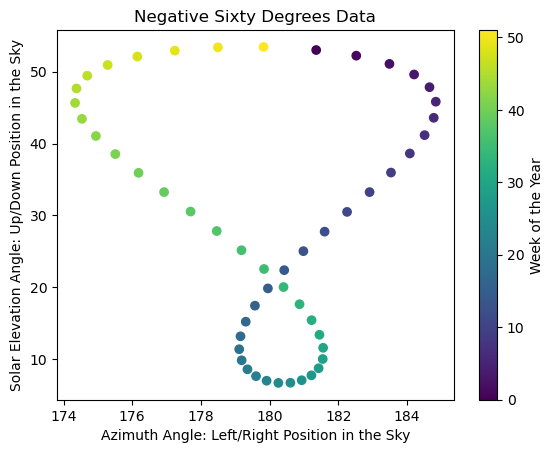

In [453]:
#Regraphing negative sixty degree data with changes 
scatter = plt.scatter(x_ns, y_ns, c = ns.index)
plt.title('Negative Sixty Degrees Data')
plt.xlabel('Azimuth Angle: Left/Right Position in the Sky')
plt.ylabel('Solar Elevation Angle: Up/Down Position in the Sky')
plt.colorbar(label = 'Week of the Year')
plt.show()

In [454]:
#Importing zero degrees latitude
z = pd.read_csv('Zero_Degrees_Latitude.csv')

In [455]:
z.head()

,Date,Solar Zenith Angle (deg),Solar Elevation corrected for atm refraction (deg),Solar Azimuth Angle (deg cw from N)
0,1/1/10,50.139297,39.879998,120.594365
1,1/8/10,50.555464,39.464118,119.337693
2,1/15/10,50.789937,39.229809,117.701855
3,1/22/10,50.839536,39.180244,115.718742
4,1/29/10,50.710028,39.309662,113.418691


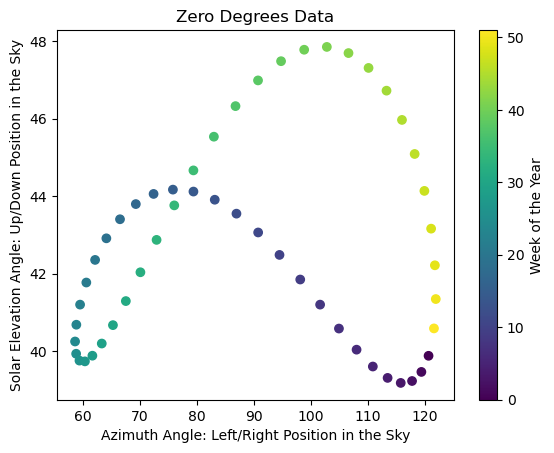

In [457]:
#Plotting a static graph of zero deg
x_z = z['Solar Azimuth Angle (deg cw from N)'] #x-axis: azimuth angle 
y_z = z['Solar Elevation corrected for atm refraction (deg)'] #y-axis: elevation angle

scatter = plt.scatter(x_z, y_z, c = z.index)
plt.title('Zero Degrees Data')
plt.xlabel('Azimuth Angle: Left/Right Position in the Sky')
plt.ylabel('Solar Elevation Angle: Up/Down Position in the Sky')
plt.colorbar(label = 'Week of the Year')
plt.show()

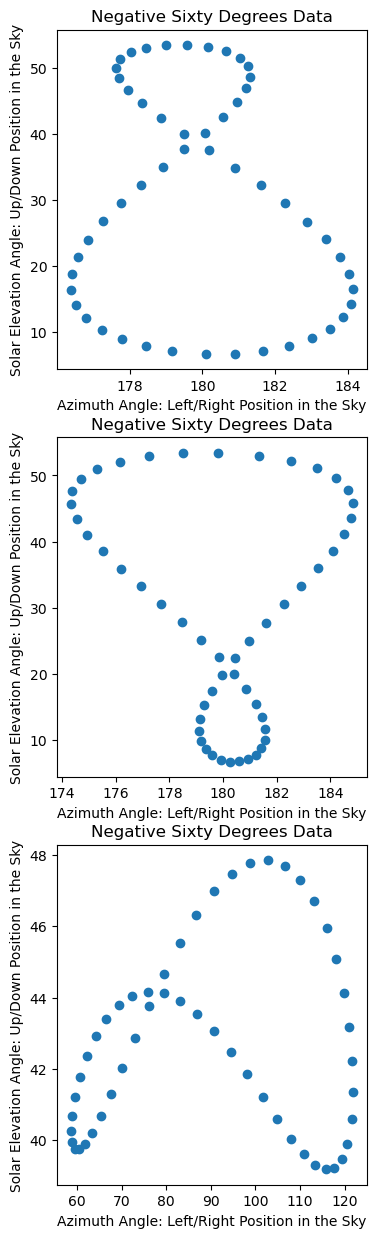

In [458]:
#Visualizing three graphs to animate on 
fig, axs = plt.subplots(3, figsize = (4, 15))

#Setting up sixty degrees latitude scatterplot 
axs[0].scatter(x_s, y_s)
axs[0].set_title('Negative Sixty Degrees Data')
axs[0].set_xlabel('Azimuth Angle: Left/Right Position in the Sky')
axs[0].set_ylabel('Solar Elevation Angle: Up/Down Position in the Sky')

#Setting up negative sixty degrees latitude scatterplot
axs[1].scatter(x_ns, y_ns)
axs[1].set_title('Negative Sixty Degrees Data')
axs[1].set_xlabel('Azimuth Angle: Left/Right Position in the Sky')
axs[1].set_ylabel('Solar Elevation Angle: Up/Down Position in the Sky')

#Setting up zero degrees latitude scatterplot 
axs[2].scatter(x_z, y_z)
axs[2].set_title('Negative Sixty Degrees Data')
axs[2].set_xlabel('Azimuth Angle: Left/Right Position in the Sky')
axs[2].set_ylabel('Solar Elevation Angle: Up/Down Position in the Sky')

plt.show()

In [459]:
#Writing a function to display the time of year on the graphs
def month(date):
    if date[0:2] == '1/': 
        month = 'January'
    elif date[0:2] == '2/':
        month = 'Febuary'
    elif date[0:2] == '3/':
        month = 'March'
    elif date[0:2] == '4/':
        month = 'April'
    elif date[0:2] == '5/':
        month = 'May'
    elif date[0:2] == '6/':
        month = 'June'
    elif date[0:2] == '7/':
        month = 'July'
    elif date[0:2] == '8/':
        month = 'August'
    elif date[0:2] == '9/':
        month = 'September'
    elif date[0:2] == '10':
        month = 'October'
    elif date[0:2] == '11':
        month = 'November'
    elif date[0:2] == '12':
        month = 'December'
    return month 

#Checking the function works
print(month(s['Date'][44]))

November


In [460]:
#Creating a function that will return the location of a row in the dataframe based on a value
def return_row(value):
    row, column = np.where(s == value)
    return int(row)

In [461]:
#Starting animation process!

In [466]:
#Sixty Degrees Latitude: 

#Initiating Plots 
fig, ax = plt.subplots(figsize = (5,5))
ax.set_xlim((np.min(x_s) - 2), (np.max(x_s) + 2))
ax.set_ylim((np.min(y_s) - 10), (np.max(y_s) + 10))    
ax.set_title('Sixty Degrees Latitude')
ax.set_xlabel('Solar Azimuth Angle (° CW from N)')
ax.set_ylabel('Corrected Solar Elevation Angle (°)')

#Creating a method of graphing a scatter plot
scatter = ax.scatter(x, y)

#Creating a function that updates the animation and time of year label
def update(t):
    scatter.set_offsets(np.column_stack((x_s[:t+1], y_s[:t+1])))
    if t != 0:
        if month(s['Date'][t]) != month(s['Date'][t-1]):
            text = ax.text(x_s[t], y_s[t], s = month(s['Date'][t]))
        else: 
            text = ax.text(x_s[t], y_s[t], s = '')
    else: 
        text = ax.text(x_s[t], y_s[t], s = 'January')
    return scatter,

#Calling the Animation
anim = FuncAnimation(fig, update, frames = len(x_s), interval = 50, blit = True)

#Additional code to allow the animaton to run and save
writer = PillowWriter(fps = 10)

In [467]:
#Negative Sixty Degrees Latitude: 

#Initiating Plots 
fig, ax = plt.subplots(figsize = (5,5))
ax.set_xlim((np.min(x_ns) - 2), (np.max(x_ns) + 2))
ax.set_ylim((np.min(y_ns) - 10), (np.max(y_ns) + 10))    
ax.set_title('Negative Sixty Degrees Latitude')
ax.set_xlabel('Solar Azimuth Angle (° CW from N)')
ax.set_ylabel('Corrected Solar Elevation Angle (°)')

#Creating a method of graphing a scatter plot
scatter = ax.scatter(x, y)

#Creating a function that updates the animation and time of year label
def update(t):
    scatter.set_offsets(np.column_stack((x_ns[:t+1], y_ns[:t+1])))
    if t != 0:
        if month(s['Date'][t]) != month(s['Date'][t-1]):
            text = ax.text(x_ns[t], y_ns[t], s = month(s['Date'][t]))
        else: 
            text = ax.text(x_ns[t], y_ns[t], s = '')
    else: 
        text = ax.text(x_ns[t], y_ns[t], s = 'January')
    return scatter,

#Calling the Animation
anim = FuncAnimation(fig, update, frames = len(x_ns), interval = 50, blit = True)

#Additional code to allow the animaton to run and save
writer = PillowWriter(fps = 10)
anim.save('Negative_Sixty_Degrees_Latitude.gif', writer = writer)

In [468]:
#Zero Degrees Latitude: 

#Initiating Plots 
fig, ax = plt.subplots(figsize = (5,5))
ax.set_xlim((np.min(x_z) - 2), (np.max(x_z) + 2))
ax.set_ylim((np.min(y_z) - 10), (np.max(y_z) + 10))    
ax.set_title('Zero Degrees Latitude')
ax.set_xlabel('Solar Azimuth Angle (° CW from N)')
ax.set_ylabel('Corrected Solar Elevation Angle (°)')

#Creating a method of graphing a scatter plot
scatter = ax.scatter(x, y)

#Creating a function that updates the animation and time of year label
def update(t):
    scatter.set_offsets(np.column_stack((x_z[:t+1], y_z[:t+1])))
    if t != 0:
        if month(s['Date'][t]) != month(s['Date'][t-1]):
            text = ax.text(x_z[t], y_z[t], s = month(s['Date'][t]))
        else: 
            text = ax.text(x_z[t], y_z[t], s = '')
    else: 
        text = ax.text(x_z[t], y_z[t], s = 'January')
    return scatter,

#Calling the Animation
anim = FuncAnimation(fig, update, frames = len(x_z), interval = 50, blit = True)

#Additional code to allow the animaton to run and save
writer = PillowWriter(fps = 10)
anim.save('Zero_Degrees_Latitude.gif', writer = writer)